#**SIMULATED ANNEALING USING GIVEN DATA**

**Maximize:**

$\Sigma(c_{i}y_{i}) $

**Probability of accepting a lower solution:**

 $p=e^{\frac{-(f_{s}-f'_{s})}{T}}$

In [ ]:
#Importing the dataset for Operations optimization
import pandas as pd
df =pd.read_excel('/content/HW8_PSCdat.xlsx')
print(df)

    -3   0
0    7   0
1   -2   1
2    4   1
3    3   0
4    6   0
..  ..  ..
94   2   0
95   8   0
96   3   1
97  -3   1
98   7   1

[99 rows x 2 columns]


#**Problem defined as**:
**Maximize:** $\Sigma(c_{i}y_{i}) $

In [ ]:
#Importing required libraries and preprocessing:
import numpy as np
data=np.array(df)
data=data.astype(float)
ci=data[:,0]
yi=data[:,1]

In [ ]:
#Temperature annealing with restart at 100 points
def Temp(NoIter,Tini,a):
  T=[Tini]
  for i in range (99):
    if (i<100):
      m=0.96*T[i]
      T.append(m)
    elif(i==100):
       T[i]=50
  restart=NoIter/len(T)
  Ttot=[]
  Ttot.extend([T for i in range(int(restart))])
  Ttot=np.array(Ttot)
  Ttot=Ttot.reshape(1,1000)
  Ttot=list(Ttot)     
  return(Ttot)

In [ ]:
#Using loops for finding required solutions:
def objective(a,b,NoIter,Tini):
  np.random.seed(10)
  r=NoIter
  pdsum=[]
  N=[]
  n=[]
  iter=[]
  reject=[]

#Calling the function for annealing with restart:
  Ttot=Temp(NoIter,Tini,a)

#initialising the solution
  pdsum=[-144]

  for i in range(r):
    #No. of iterations
    iter.append(i)

#Generated the random number 
    m=np.random.randint(0,len(b))
    #Appending the number m to the list N
    N.append(m)
#Single bit flipping the y value at the random number:
    if b[m] == 1:
      b[m] = 0
    elif b[m] == 0:
      b[m] = 1

#Calculating the internal solution pdt list. 
    pdt=[]
    for v in range(len(a)):
      #calculating the new solution value:
      c=a[v]*b[v]
      pdt.append(c)
#Calculating the summation of the product list calculated which is the fitness 
    j=np.sum(pdt)
    # print(len(pdt))
    # print(j)
    # print(pdsum[i])
    # print(len(pdsum))

#Taking decision about j: comparing with the objective value
#If j greater than objective value
    if(j>pdsum[i]):
      pdsum.append(j)
      n.append(0)
      reject.append(0)
#If j equal to objective value
    elif(j==pdsum[i]):
      p1=np.exp((j-pdsum[i])/(Ttot[0][i]))
      p=np.random.rand(1)
      n.append(p)
      if(p<p1):
        pdsum.append(j)
        reject.append(0)
      elif(p==p1):
        reject.append(j)
        pdsum.append(pdsum[i])      
      else:
        reject.append(j)
        pdsum.append(pdsum[i])
#If j smaller than objective value            
    elif(j<pdsum[i]):
      p1=np.exp((j-pdsum[i])/(Ttot[0][i]))
      p=np.random.rand(1)
      n.append(p)
      if(p<p1):
        pdsum.append(j)
        reject.append(0)
      elif(p==p1):
        reject.append(j)
        pdsum.append(pdsum[i])      
      else:
        reject.append(j)
        pdsum.append(pdsum[i])
#Returning all required data    
  return (pdsum,n,N,reject,iter)

In [ ]:
#Running the simulated annealing process:
#Defining initial values:
NoIter=1000
Tini=50
#Calling the function:
pdsum,n,N,reject,iter=objective(ci,yi,NoIter,Tini)


In [ ]:
#Finding the time for execution of the code:
%timeit objective(ci,yi,NoIter,Tini)

10 loops, best of 5: 105 ms per loop


In [72]:
#Printing the best result identified:
maxval=np.max(pdsum)
Itmax=np.where(pdsum==maxval)
print(f'The maximum value obtained during Simulated annealing is {maxval:1.2f} and it was obtained on the {Itmax[0]} iteration')

The maximum value obtained during Simulated annealing is 32.00 and it was obtained on the [823] iteration


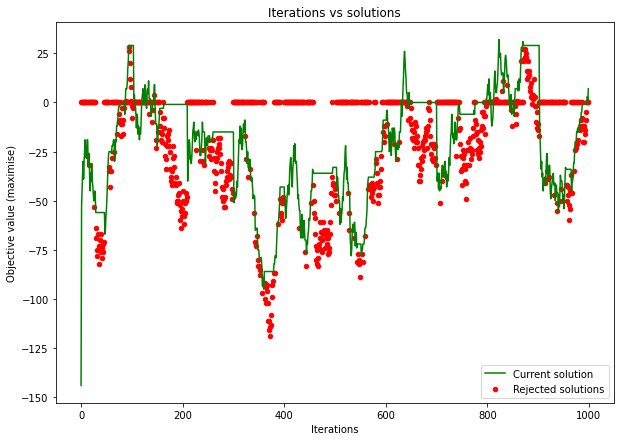

In [ ]:
#Visualising the solutions:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(iter,pdsum[0:-1],c='g')
plt.scatter(iter,reject,c='r',s=20)
plt.legend(labels=('Current solution','Rejected solutions'))
plt.xlabel("Iterations")
plt.ylabel("Objective value (maximise)")
plt.title("Iterations vs solutions")
plt.show();